In [147]:
#Purpose: clean SESAR data and store them to cleanedfile, train file and test file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
original = pd.read_csv('../Collections_data/SESAR_5000_original.csv')
core = pd.read_csv('../Collections_data/SESAR_5000_core.csv')

In [149]:
original = original.drop([original.columns[0]], axis=1)
core = core.drop([core.columns[0]], axis=1)

In [151]:
CVs = core[['uri', 'hasContextCategory', 'hasMaterialCategory', 'hasSpecimenCategory']]
CVs['hasContextCategory'].str.replace("[^\w\s]", "", regex=True).value_counts()/5000

Not Provided                     0.5420
Earth interior                   0.4070
Marine water body bottom         0.0180
Subaerial surface environment    0.0122
Lake river or stream bottom      0.0110
Name: hasContextCategory, dtype: float64

0 2710
1 2035
2 90
3 61
4 55


Text(0.5, 0, 'count')

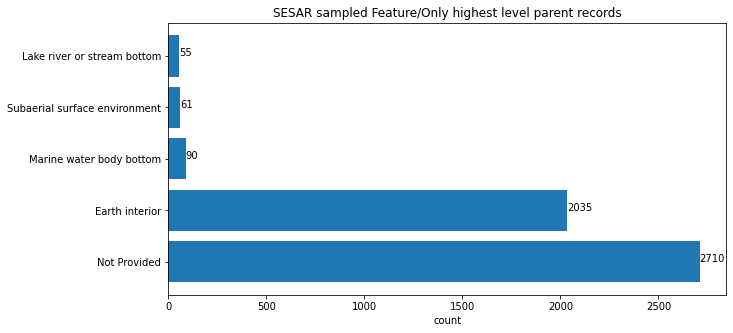

In [169]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot()
dis = CVs['hasContextCategory'].value_counts()
p = ax.barh(dis.keys().str.replace("[^\w\s]", "", regex=True), dis)
for i, rect in enumerate(dis.index):
    print(i, dis[rect])
    ax.text(dis[rect], i,  dis[rect])
plt.title('SESAR sampled Feature')
plt.xlabel('count')

In [153]:
CVs['hasMaterialCategory'].str.replace("[^\w\s]", "", regex=True).value_counts()/5000

Not Provided                                     0.4022
Mineral                                          0.2458
Rock                                             0.1608
Sediment                                         0.1520
Water                                            0.0140
Soil                                             0.0122
Organic material Biogenic nonorganic material    0.0018
Organic material                                 0.0006
Particulate                                      0.0004
Mineral Organic material                         0.0004
Name: hasMaterialCategory, dtype: float64

0 2011
1 1229
2 804
3 760
4 70
5 61
6 9
7 3
8 2
9 2


Text(0.5, 0, 'count')

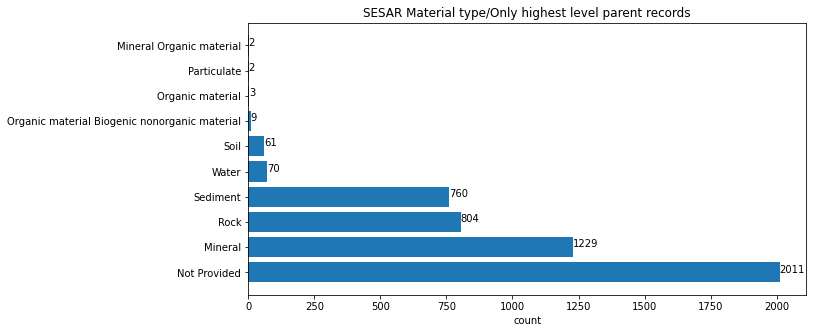

In [170]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot()
dis = CVs['hasMaterialCategory'].value_counts()
p = ax.barh(dis.keys().str.replace("[^\w\s]", "", regex=True), dis)
for i, rect in enumerate(dis.index):
    print(i, dis[rect])
    ax.text(dis[rect], i,  dis[rect])
plt.title('SESAR Material type')
plt.xlabel('count')

In [155]:
CVs['hasSpecimenCategory'].str.replace("[^\w\s]", "", regex=True).value_counts()/5000

Other solid object        0.6660
Not Provided              0.2324
Aggregation               0.0848
Analytical preparation    0.0070
Name: hasSpecimenCategory, dtype: float64

0 3330
1 1162
2 424
3 35


Text(0.5, 0, 'count')

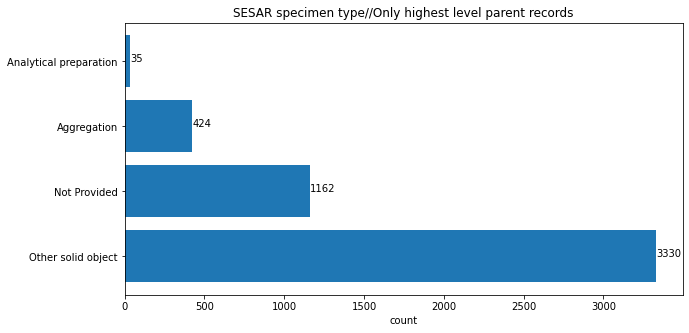

In [171]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot()
dis = CVs['hasSpecimenCategory'].value_counts()
p = ax.barh(dis.keys().str.replace("[^\w\s]", "", regex=True), dis)
for i, rect in enumerate(dis.index):
    print(i, dis[rect])
    ax.text(dis[rect], i,  dis[rect])
plt.title('SESAR specimen type')
plt.xlabel('count')

In [157]:
df = original.merge(CVs, left_on='igsn', right_on='uri')
df.replace(np.nan, '', regex=True, inplace=True)

In [167]:
#, 
Nofields = ['igsn', '@context','description.log','registrant.name', 'registrant.identifiers.id', 'registrant.identifiers.kind', 'description.collector', 
'description.publisher.@id', 'description.publisher.url', 'description.publisher.contactPoint.url', 'description.publisher.contactPoint.email',
'description.contributors', 'description.collectorDetail', 'description.supplementMetadata.depthMax', 'description.supplementMetadata.depthMin',
'description.supplementMetadata.document', 'description.supplementMetadata.sampleId', 'description.supplementMetadata.childIGSN', 'description.supplementMetadata.elevation',
'description.supplementMetadata.depthScale', 'description.supplementMetadata.elevationUnit', 'description.supplementMetadata.publicationUrl',
'description.collectionStartDate', 'description.collectionDatePrecision', 'description.parentIdentifier', 'description.supplementMetadata.siblingIGSN',
'description.supplementMetadata.platformType', 'description.supplementMetadata.size', 'description.supplementMetadata.sizeUnit', 'description.geoLocation.geo',
'description.supplementMetadata.currentArchiveContact', 'description.publisher.name', 'description.publisher.@type', 'description.publisher.contactPoint.name',
'description.publisher.contactPoint.@type', 'description.publisher.contactPoint.contactType', 'description.geoLocation.@type', 'description.supplementMetadata.zone',
'description.supplementMetadata.easting', 'description.supplementMetadata.northing', 'description.supplementMetadata.ageMax', 'description.supplementMetadata.ageMin',
'description.supplementMetadata.ageUnit', 'description.supplementMetadata.elevationEnd', 'description.supplementMetadata.verticalDatum', 'description.collectionEndDate',
'description.supplementMetadata.launchId', 'description.supplementMetadata.launchTypeName', 'description.sampleName','description.supplementMetadata.platformDescr',
'description.supplementMetadata.currentArchive', 'description.supplementMetadata.navigationType', 'description.igsnPrefix', 'description.supplementMetadata.originalArchive',
'description.supplementMetadata.externalSampleId', 'description.supplementMetadata.cruiseFieldPrgrm', 'detail']
cleaned = df.drop(Nofields, axis=1)

In [172]:
cleaned

,@id,description.material,description.sampleType,description.supplementMetadata.country,description.supplementMetadata.province,description.supplementMetadata.fieldName,description.supplementMetadata.otherName,description.supplementMetadata.localityDescription,description.supplementMetadata.locationDescription,description.supplementMetadata.locality,...,description.supplementMetadata.geologicalUnit,description.supplementMetadata.platformName,description.supplementMetadata.launchPlatformName,description.supplementMetadata.classificationComment,description.supplementMetadata.externalParentName,description.supplementMetadata.externalParentSampleTypeId,uri,hasContextCategory,hasMaterialCategory,hasSpecimenCategory
0,https://data.geosamples.org/sample/igsn/NHB000A84,Galena>Mineral,Individual Sample,United States,Virginia,Galena,[],Amelia,"Matched to the GeoNames record for Amelia Co.,...",,...,,,,,,,NHB000A84,['Earth interior'],['Mineral'],['Other solid object']
1,https://data.geosamples.org/sample/igsn/IEAVO01J6,,Site,United States,Alaska,,['33775'],,No latitude/longitude known for this site. Lat...,Kaguyak,...,,,,,,,IEAVO01J6,['Not Provided'],['Not Provided'],['Not Provided']
2,https://data.geosamples.org/sample/igsn/GRO002099,Liquid>aqueous,Individual Sample,United States,Mississippi,,['M168'],,,Mississippi River,...,,,,,,,GRO002099,['Not Provided'],['Water'],['Other solid object']
3,https://data.geosamples.org/sample/igsn/ODP005186,,Hole,,,,[],,,,...,,,,,,,ODP005186,['Not Provided'],['Not Provided'],['Not Provided']
4,https://data.geosamples.org/sample/igsn/IEAVO00TC,,Site,United States,Alaska,,['6006041'],,No latitude/longitude known for this site. Lat...,Westdahl,...,,,,,,,IEAVO00TC,['Not Provided'],['Not Provided'],['Not Provided']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,https://data.geosamples.org/sample/igsn/GRO000177,Liquid>aqueous,Individual Sample,Canada,British Columbia,,['1 L HDPE'],Dock near old ferry dock,,Fraser River at Fort Langley,...,,,,,,,GRO000177,['Not Provided'],['Water'],['Other solid object']
4947,https://data.geosamples.org/sample/igsn/ARF000GH4,,Core Half Round,,,,[],,,Amundsen Sea,...,,,,,,,ARF000GH4,['Not Provided'],['Not Provided'],['Other solid object']
4948,https://data.geosamples.org/sample/igsn/NHB003GJP,Calcite>Mineral,Individual Sample,United States,California,Calcite,[],Boron,"Matched to the GeoNames record for Boron, Kern...",,...,,,,,,,NHB003GJP,['Earth interior'],['Mineral'],['Other solid object']
4949,https://data.geosamples.org/sample/igsn/IESFS00ID,,Dredge,,,,[],,,,...,,,,,,,IESFS00ID,['Not Provided'],['Not Provided'],['Aggregation']


In [173]:
#caluate how many records are empty for each field
fields = original.drop(Nofields, axis=1).drop(['@id'], axis=1)
empty_fields = fields.isnull().sum()/5000 * 100

Text(0.5, 0, 'Percentage % (total 5000 records sampled from 1784731 records)')

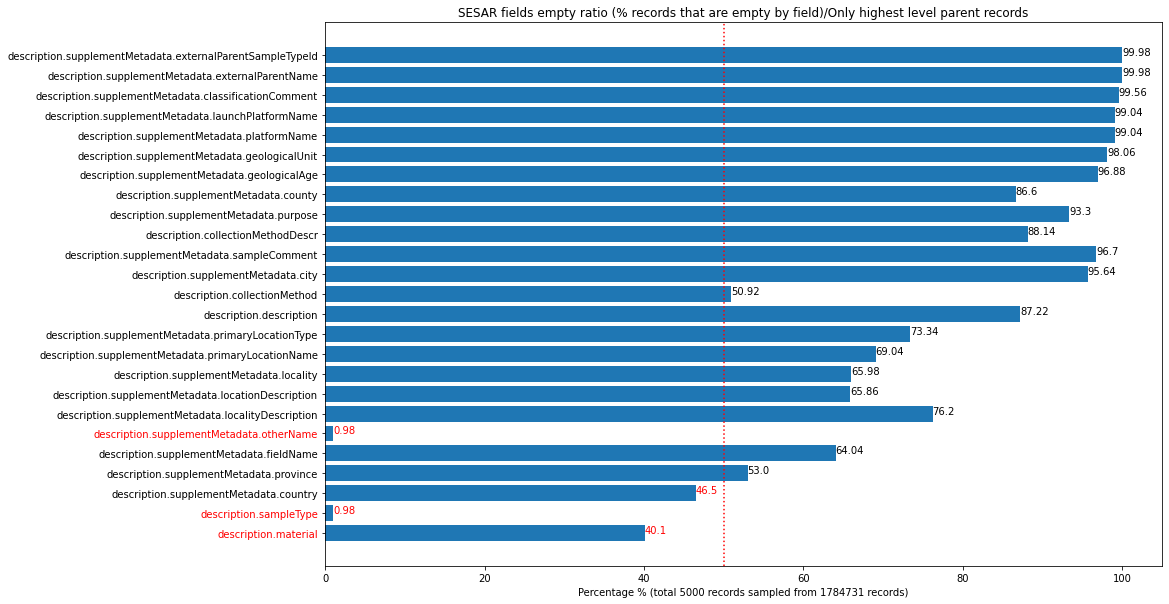

In [175]:
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot()
p = ax.barh(empty_fields.keys(), empty_fields)
for i, rect in enumerate(empty_fields.index):
    ax.text(empty_fields[rect], i,  round(empty_fields[rect], 4), color = 'black' if round(empty_fields[rect], 4) >= 50 else 'red')
plt.gca().get_yticklabels()[0].set_color('red') 
plt.gca().get_yticklabels()[1].set_color('red')
plt.gca().get_yticklabels()[5].set_color('red')
plt.axvline(50, color='red', ls='dotted')
plt.title("SESAR fields empty ratio (% records that are empty by field)/Only highest level parent records")
plt.xlabel('Percentage % (total 5000 records sampled from 1784731 records)')

In [161]:
#SpecimenType 
specimenType = cleaned.drop(['hasContextCategory', 'hasMaterialCategory'], axis=1)
specimenType['hasSpecimenCategory'] = specimenType['hasSpecimenCategory'].str.replace('[^\w\s]','', regex=True)
specimenType['hasSpecimenCategory'] = specimenType['hasSpecimenCategory'].str.replace(' ','_', regex=True)
specimenType['hasSpecimenCategory'] = "__label__" + specimenType['hasSpecimenCategory']
specimenType['text'] = ""
for col in specimenType.columns[1:len(specimenType.columns)-2]:
    specimenType['text']  += str(specimenType[col]) +' '

specimenType['text'] = specimenType['text'].str.replace('[^\w\s]','', regex=True)
specimenType['text'] = specimenType['text'].str.lower()
specimenType['text'] = specimenType['text'].replace('\s+', ' ', regex=True)

result = specimenType.loc[specimenType['hasSpecimenCategory'] != '__label__Not_Provided']
result = result.sample(n=1000, random_state=2)

result['fasttext'] = result['hasSpecimenCategory'] + " " + result['text']

train = result['fasttext'].sample(frac=0.7, random_state=99) 
test = result['fasttext'].loc[~result['fasttext'].index.isin(train.index)]
print(len(train), len(test))

result['fasttext'].to_csv('../Collections_data/cleanedSESAR_specimenType.txt', header=False, index=False)
train.to_csv('../Collections_data/SESARtrain_specimenType.train', header=False, index=False)
test.to_csv('../Collections_data/SESARValid_specimenType.valid', header=False, index=False)

700 300


In [162]:
#Material Type
materialType = cleaned.drop(['hasContextCategory', 'hasSpecimenCategory'], axis=1)
materialType['hasMaterialCategory'] = materialType['hasMaterialCategory'].str.replace('[^\w\s]','', regex=True)
materialType['hasMaterialCategory'] = materialType['hasMaterialCategory'].str.replace(' ','_', regex=True)
materialType['hasMaterialCategory'] = "__label__" + materialType['hasMaterialCategory']

materialType['text'] = ""
for col in materialType.columns[1:len(materialType.columns)-2]:
    materialType['text']  += str(materialType[col]) +' '

materialType['text'] = materialType['text'].str.replace('[^\w\s]','', regex=True)
materialType['text'] = materialType['text'].str.lower()
materialType['text'] = materialType['text'].replace('\s+', ' ', regex=True)

result = materialType.loc[materialType['hasMaterialCategory'] != '__label__Not_Provided']

result = result.sample(n=1000, random_state=2)

result['fasttext'] = result['hasMaterialCategory'] + " " + result['text']

train = result['fasttext'].sample(frac=0.7, random_state=99) 
test = result['fasttext'].loc[~result['fasttext'].index.isin(train.index)]
print(len(train), len(test))

result['fasttext'].to_csv('../Collections_data/cleanedSESAR_materialType.txt', header=False, index=False)
train.to_csv('../Collections_data/SESARtrain_materialType.train', header=False, index=False)
test.to_csv('../Collections_data/SESARValid_materialType.valid', header=False, index=False)

700 300


In [163]:
result[['hasMaterialCategory','text']].to_csv('SESAR_1000_material.csv')

In [164]:
#Sampled Feature
sampeldFeature = cleaned.drop(['hasMaterialCategory', 'hasSpecimenCategory'], axis=1)
sampeldFeature['hasContextCategory'] = sampeldFeature['hasContextCategory'].str.replace('[^\w\s]','', regex=True)
sampeldFeature['hasContextCategory'] = sampeldFeature['hasContextCategory'].str.replace(' ','_', regex=True)
sampeldFeature['hasContextCategory'] = "__label__" + sampeldFeature['hasContextCategory']

sampeldFeature['text'] = ""
for col in sampeldFeature.columns[1:len(sampeldFeature.columns)-2]:
    sampeldFeature['text']  += str(sampeldFeature[col]) +' '

sampeldFeature['text'] = sampeldFeature['text'].str.replace('[^\w\s]','', regex=True)
sampeldFeature['text'] = sampeldFeature['text'].str.lower()
sampeldFeature['text'] = sampeldFeature['text'].replace('\s+', ' ', regex=True)

result = sampeldFeature.loc[sampeldFeature['hasContextCategory'] != '__label__Not_Provided']

result = result.sample(n=1000, random_state=2)

result['fasttext'] = result['hasContextCategory'] + " " + result['text']

train = result['fasttext'].sample(frac=0.7, random_state=99) 
test = result['fasttext'].loc[~result['fasttext'].index.isin(train.index)]
print(len(train), len(test))

result['fasttext'].to_csv('../Collections_data/cleanedSESAR_sampeldFeature.txt', header=False, index=False)
train.to_csv('../Collections_data/SESARtrain_sampeldFeature.train', header=False, index=False)
test.to_csv('../Collections_data/SESARValid_sampeldFeature.valid', header=False, index=False)

700 300
